# CHAPTER 10 기타 기계학습을 이용한 데이터 분석

##  10.1 K-means

### 10.1.4 K-means 실습

#####  예제 1

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# generate sample data
# set seed (random number generator)
np.random.seed(0)
# set centers
centers = [[1, 1], [0, 0], [2, -1]]

# n_samples : the total 
# centers : the number of centers to generate
# cluster_std : fixed center locations
data, labels_true = make_blobs(n_samples = 2000, centers = centers, 
                               cluster_std = 0.7)

In [3]:
data.shape

(2000, 2)

In [4]:
print(data)
print()
print(labels_true)
print(np.unique(labels_true))

[[ 2.88735684  0.94825273]
 [ 0.00712986  1.53880744]
 [ 0.3264657  -0.06607475]
 ...
 [ 0.53901292  0.64003622]
 [ 1.65065358  1.40755721]
 [ 0.74131908 -0.71579507]]

[0 1 1 ... 0 0 1]
[0 1 2]


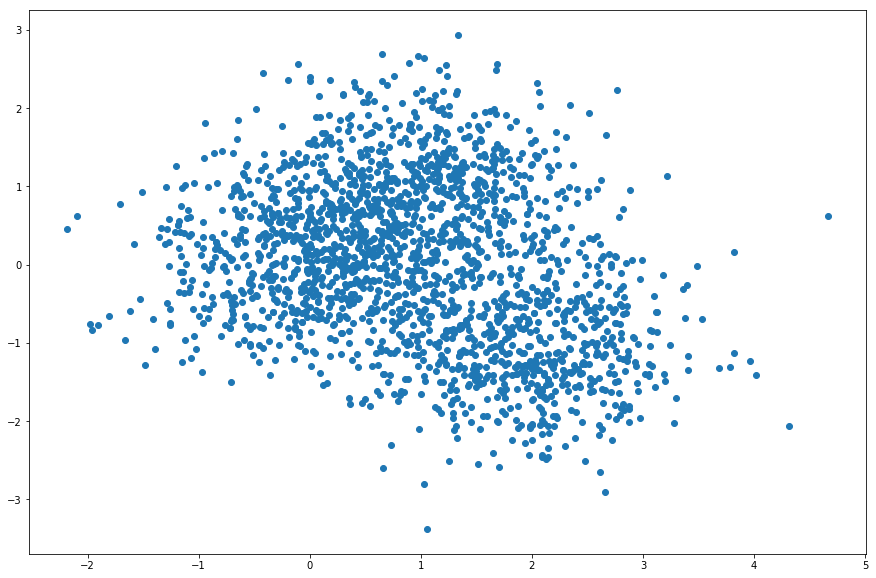

In [5]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1])

In [6]:
# compute clustering with KMeans
estimator = KMeans(init = 'k-means++', n_clusters = 3, n_init = 10)
estimator.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels_predict = estimator.labels_
np.unique(labels_predict)

array([0, 1, 2])

In [8]:
# normalize into [0,1]
cm = plt.cm.get_cmap('jet')
scaled_labels = (labels_predict - np.min(labels_predict)) 
scaled_labels = scaled_labels /(np.max(labels_predict) - np.min(labels_predict))
np.unique(scaled_labels)

array([0. , 0.5, 1. ])

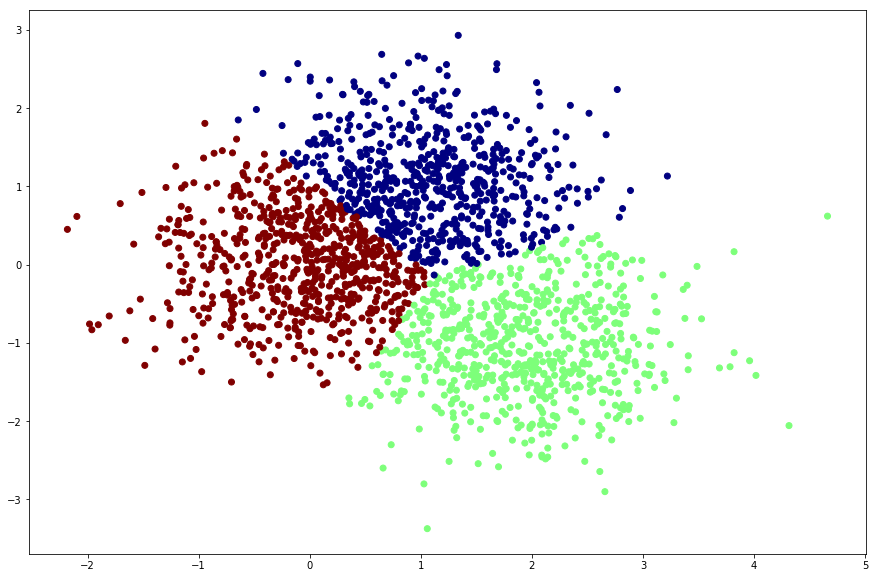

In [9]:
plt.figure(figsize=(15,10))
plt.scatter(data[:,0], data[:,1], c = cm(scaled_labels))

##### 예제 2

In [10]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import pandas as pd 

In [11]:
digits = load_digits()
data = digits.data
print("< Before scaling >")
print(data)
print("< After scaling >")
data = scale(data)
print(data)

< Before scaling >
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
< After scaling >
[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [12]:
labels_true = digits.target
n_samples, n_features = data.shape
clusters = np.unique(labels_true)
n_clusters = len(clusters)

print("n_samples : " + str(n_samples))
print("n_features : " + str(n_features))
print("n_clusters : " + str(n_clusters))
print("clusters : " + str(clusters))

n_samples : 1797
n_features : 64
n_clusters : 10
clusters : [0 1 2 3 4 5 6 7 8 9]


In [13]:
estimator1 = KMeans(init = 'k-means++', n_clusters = n_clusters, n_init = 10)
estimator1.fit(data)

estimator2 = KMeans(init = 'random', n_clusters = n_clusters, n_init = 10)
estimator2.fit(data)

labels_predict1 = estimator1.labels_
labels_predict2 = estimator2.labels_

In [14]:
from sklearn import metrics

print("< clustering performance evaluation >\n")
print("1. clustering with initializing first centroids of clusters with k-means++ function ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict1)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict1)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict1)))
print("2. clustering with initializing first centroids of clusters randomly ")
print('homogenity score : %.3f' 
      %(metrics.homogeneity_score(labels_true, labels_predict2)))
print('completeness score : %.3f' 
      %(metrics.completeness_score(labels_true, labels_predict2)))
print('v-measure score : %.3f \n'
     %(metrics.v_measure_score(labels_true, labels_predict2)))

< clustering performance evaluation >

1. clustering with initializing first centroids of clusters with k-means++ function 
homogenity score : 0.604
completeness score : 0.652
v-measure score : 0.627 

2. clustering with initializing first centroids of clusters randomly 
homogenity score : 0.596
completeness score : 0.642
v-measure score : 0.618 

